In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Yüklenen zip dosyasının açılması
import zipfile
zip_path = '/content/drive/MyDrive/ai_vs_real_dataset/AIvsRealMiniV4.zip'  # ZIP dosyasının yolu
extract_path = '/content/mini_dataset_v4'  # Nereye açılacağı

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
# GEREKLİ KÜTÜPHANELER
!pip install -q tensorflow matplotlib

import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os


In [ ]:
# Verisetindeki hatalı verilerin temizlenmesi
from PIL import Image
import os

DATASET_PATH = "/content/mini_dataset_v4/AIvsRealMiniV4"
subsets = ["train", "val", "test"]
classes = ["real", "fake"]

invalid_files = []

for subset in subsets:
    for cls in classes:
        folder_path = os.path.join(DATASET_PATH, subset, cls)
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            try:
                with Image.open(file_path) as img:
                    img.verify()  # Dosya bozuksa burada belli oluyor
            except Exception as e:
                print(f"❌ Siliniyor: {file_path} (Hata: {e})")
                invalid_files.append(file_path)
                os.remove(file_path)

print(f"🧼 Temizlik tamamlandı. Silinen dosya sayısı: {len(invalid_files)}")


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


❌ Siliniyor: /content/mini_dataset_v4/AIvsRealMiniV4/train/fake/fake_015223.jpg (Hata: cannot identify image file '/content/mini_dataset_v4/AIvsRealMiniV4/train/fake/fake_015223.jpg')
❌ Siliniyor: /content/mini_dataset_v4/AIvsRealMiniV4/train/fake/fake_040620.jpg (Hata: cannot identify image file '/content/mini_dataset_v4/AIvsRealMiniV4/train/fake/fake_040620.jpg')
🧼 Temizlik tamamlandı. Silinen dosya sayısı: 2


Found 69998 files belonging to 2 classes.
Found 15000 files belonging to 2 classes.
Found 15000 files belonging to 2 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/30
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 293s 121ms/step - accuracy: 0.6378 - loss: 0.0709 - val_accuracy: 0.8593 - val_loss: 0.0243 - learning_rate: 1.0000e-04
Epoch 2/30
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 324s 124ms/step - accuracy: 0.7995 - loss: 0.0315 - val_accuracy: 0.9149 - val_loss: 0.0185 - learning_rate: 1.0000e-04
Epoch 3/30
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 272s 124ms/step - accuracy: 0.8579 - loss: 0.0242 - val_accuracy: 0.9279 - val_loss: 0.0157 - learning_rate: 1.0000e-04
Epoch 4/30
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 272s 124ms/step - accuracy: 0.8879 - loss: 0.0198 - val_accuracy: 0.9487 - val_loss: 0.0116 - learning_rate: 1.0000e-04
Epoch 5/30
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 262s 120ms/step - accuracy: 0.9046 - loss: 0.0176 - val_accuracy: 0.9529 - val_loss: 0.0094 - learning_rate: 1.0000e-04
Epoch 6/30
21

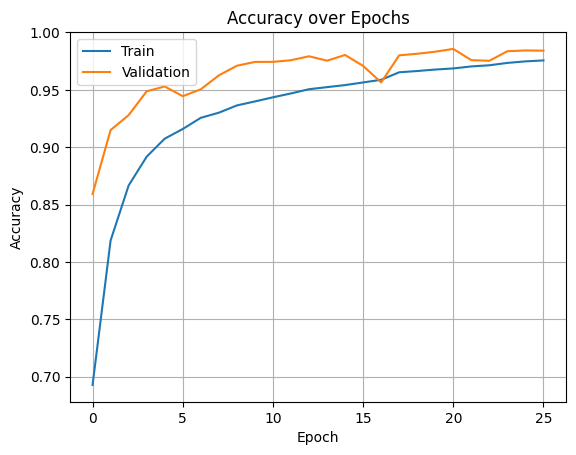

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1

In [ ]:
# PARAMETRELER
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
DATASET_PATH = "/content/mini_dataset_v4/AIvsRealMiniV4"

# VERİ ARTIRIMI
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.25),
    layers.RandomContrast(0.3),
    layers.RandomBrightness(0.2),
])

# EFFICIENTNET PREPROCESSING
from tensorflow.keras.applications.efficientnet import preprocess_input
preprocess_layer = layers.Lambda(preprocess_input)

# VERİ SETİNİ YÜKLE
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(DATASET_PATH, "train"),
    label_mode='binary',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(DATASET_PATH, "val"),
    label_mode='binary',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(DATASET_PATH, "test"),
    label_mode='binary',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

# PREFETCH
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds = val_ds.prefetch(AUTOTUNE)
test_ds = test_ds.prefetch(AUTOTUNE)

# BASE MODEL: EfficientNetB0
from tensorflow.keras.applications import EfficientNetB0

base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = True
for layer in base_model.layers[:-50]:
    layer.trainable = False

# MODEL MİMARİSİ
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_layer(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = models.Model(inputs, outputs)

# OPTİMİZER
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

# FOCAL LOSS (MANUEL TANIM)
def binary_focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        return -tf.reduce_mean(alpha * tf.pow(1. - pt, gamma) * tf.math.log(pt))
    return focal_loss_fixed

# DERLEME
model.compile(
    optimizer=optimizer,
    loss=binary_focal_loss(gamma=2.0, alpha=0.25),
    metrics=['accuracy']
)

# CALLBACKS
early_stop = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=2, verbose=1)

# SINIF AĞIRLIKLARI
class_weight = {0: 1.2, 1: 1.0}

# MODELİ EĞİT
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[early_stop, reduce_lr],
    class_weight=class_weight
)

# ACCURACY GRAFİĞİ
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# TEST VERİSİYLE ANALİZ
y_true, y_pred, y_proba = [], [], []
for images, labels in test_ds:
    preds = model.predict(images).flatten()
    y_true.extend(labels.numpy())
    y_proba.extend(preds)
    y_pred.extend((preds > 0.5).astype("int"))

# CONFUSION MATRIX
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC CURVE
auc_score = roc_auc_score(y_true, y_proba)
fpr, tpr, _ = roc_curve(y_true, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

print(f"✅ ROC-AUC Score: {auc_score:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

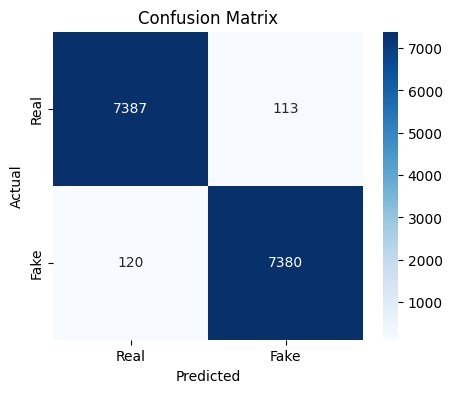

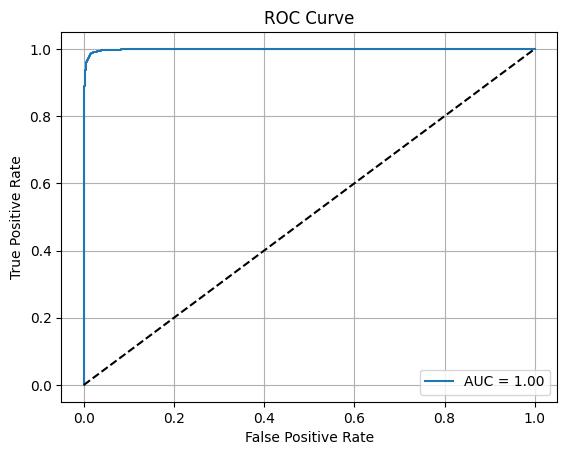

✅ ROC-AUC Score: 0.9986


In [ ]:
# TEST VERİSİYLE ANALİZ
y_true, y_pred, y_proba = [], [], []
for images, labels in test_ds:
    preds = model.predict(images).flatten()
    y_true.extend(labels.numpy())
    y_proba.extend(preds)
    y_pred.extend((preds > 0.5).astype("int"))

# CONFUSION MATRIX
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC CURVE
auc_score = roc_auc_score(y_true, y_proba)
fpr, tpr, _ = roc_curve(y_true, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

print(f"✅ ROC-AUC Score: {auc_score:.4f}")

# Modeli Kaydetme


In [ ]:
import os
from datetime import datetime
import tensorflow as tf
import pandas as pd

# 🕒 Zaman damgası
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M")

# 📊 En son doğruluk
val_acc = history.history['val_accuracy'][-1]
model_name = f"efficientnet_100k_{val_acc:.2%}_{timestamp}".replace("%", "").replace(".", "p")

# 📁 Drive klasörü
drive_model_dir = "/content/drive/MyDrive/ai_vs_real_models"a
os.makedirs(drive_model_dir, exist_ok=True)

# ✅ 1. .keras kaydet
keras_path = os.path.join(drive_model_dir, model_name + ".keras")
model.save(keras_path, include_optimizer=False)
print(f"✅ Keras formatında kaydedildi: {keras_path}")

# ✅ 2. .h5 kaydet
h5_path = os.path.join(drive_model_dir, model_name + ".h5")
#model.save(h5_path, include_optimizer=False, save_format='h5')
print(f"✅ H5 formatında kaydedildi: {h5_path}")

# ✅ 3. .tflite dönüştür ve kaydet
tflite_path = os.path.join(drive_model_dir, model_name + ".tflite")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open(tflite_path, "wb") as f:
    f.write(tflite_model)
print(f"✅ TFLite formatında kaydedildi: {tflite_path}")

# ✅ 4. CSV log kaydet
log_df = pd.DataFrame(history.history)
log_path = os.path.join(drive_model_dir, model_name + "_log.csv")
log_df.to_csv(log_path, index=False)
print(f"✅ Eğitim logu CSV olarak kaydedildi: {log_path}")


✅ Keras formatında kaydedildi: /content/drive/MyDrive/ai_vs_real_models/efficientnet_100k_98p41_2025-05-15_12-24.keras
✅ H5 formatında kaydedildi: /content/drive/MyDrive/ai_vs_real_models/efficientnet_100k_98p41_2025-05-15_12-24.h5
Saved artifact at '/tmp/tmpsds6xgg2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_238')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  134744674049808: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  134744674049040: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  134745063288336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134745063290448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134745063288144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134745063290640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134745063286224: TensorSpec(shape=(), dt



---

#Test


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Focal Loss tanımı (test için de gerekiyor)
def binary_focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        return -tf.reduce_mean(alpha * tf.pow(1. - pt, gamma) * tf.math.log(pt))
    return focal_loss_fixed


In [ ]:
def predict_with_keras(model_path, image_path):
    model = tf.keras.models.load_model(model_path, custom_objects={
        "focal_loss_fixed": binary_focal_loss(),  # Eğer focal loss kullandıysan
        "preprocess_input": preprocess_input
    })
    raw_img, img_pre = load_and_preprocess_image(image_path)
    prob = model.predict(img_pre)[0][0]
    label = "REAL" if prob > 0.5 else "FAKE"
    confidence = prob if prob > 0.5 else 1 - prob
    plt.imshow(raw_img)
    plt.title(f"{label} ({confidence:.2%})")
    plt.axis("off")
    plt.show()


In [ ]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

# 🔧 Dataset ayarı
TEST_DIR = "/content/mini_dataset_v4/AIvsRealMiniV4/test"
IMG_SIZE = (224, 224)

# 🔍 Tüm görseller
real_images = [os.path.join(TEST_DIR, "real", f) for f in os.listdir(os.path.join(TEST_DIR, "real")) if f.lower().endswith(".jpg")]
fake_images = [os.path.join(TEST_DIR, "fake", f) for f in os.listdir(os.path.join(TEST_DIR, "fake")) if f.lower().endswith(".jpg")]
all_images = real_images + fake_images

# Görsel yükleyici
def load_and_preprocess_image(image_path, img_size=(224, 224)):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=img_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_preprocessed = preprocess_input(np.expand_dims(img_array, axis=0))
    return img_array.astype("uint8"), img_preprocessed

# TFLite tahmin fonksiyonu
def predict_with_tflite(interpreter, img_pre):
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    interpreter.set_tensor(input_details[0]['index'], img_pre.astype(np.float32))
    interpreter.invoke()
    output = interpreter.get_tensor(output_details[0]['index'])[0][0]
    return output

# 🔄 Karşılaştırmalı test fonksiyonu (üstte gösterir)
def compare_models_on_random_images_single_display_filename(keras_model, tflite_model_path, num_images=10):
    selected_images = random.sample(all_images, num_images)
    plt.figure(figsize=(25, 10))

    # TFLite modeli hazırla
    interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
    interpreter.allocate_tensors()

    for i, img_path in enumerate(selected_images):
        img_raw, img_pre = load_and_preprocess_image(img_path)

        # Keras/h5 tahmin
        pred_keras = keras_model.predict(img_pre, verbose=0)[0][0]
        label_keras = "REAL" if pred_keras > 0.5 else "FAKE"
        conf_keras = pred_keras if pred_keras > 0.5 else 1 - pred_keras

        # TFLite tahmin
        pred_tflite = predict_with_tflite(interpreter, img_pre)
        label_tflite = "REAL" if pred_tflite > 0.5 else "FAKE"
        conf_tflite = pred_tflite if pred_tflite > 0.5 else 1 - pred_tflite

        plt.subplot(2, 5, i + 1)
        plt.imshow(img_raw)
        plt.title(f"{img_path}\n[Keras] {label_keras} ({conf_keras:.1%}) | [TFLite] {label_tflite} ({conf_tflite:.1%})", fontsize=8)
        plt.axis("off")

    plt.tight_layout()
    plt.show()


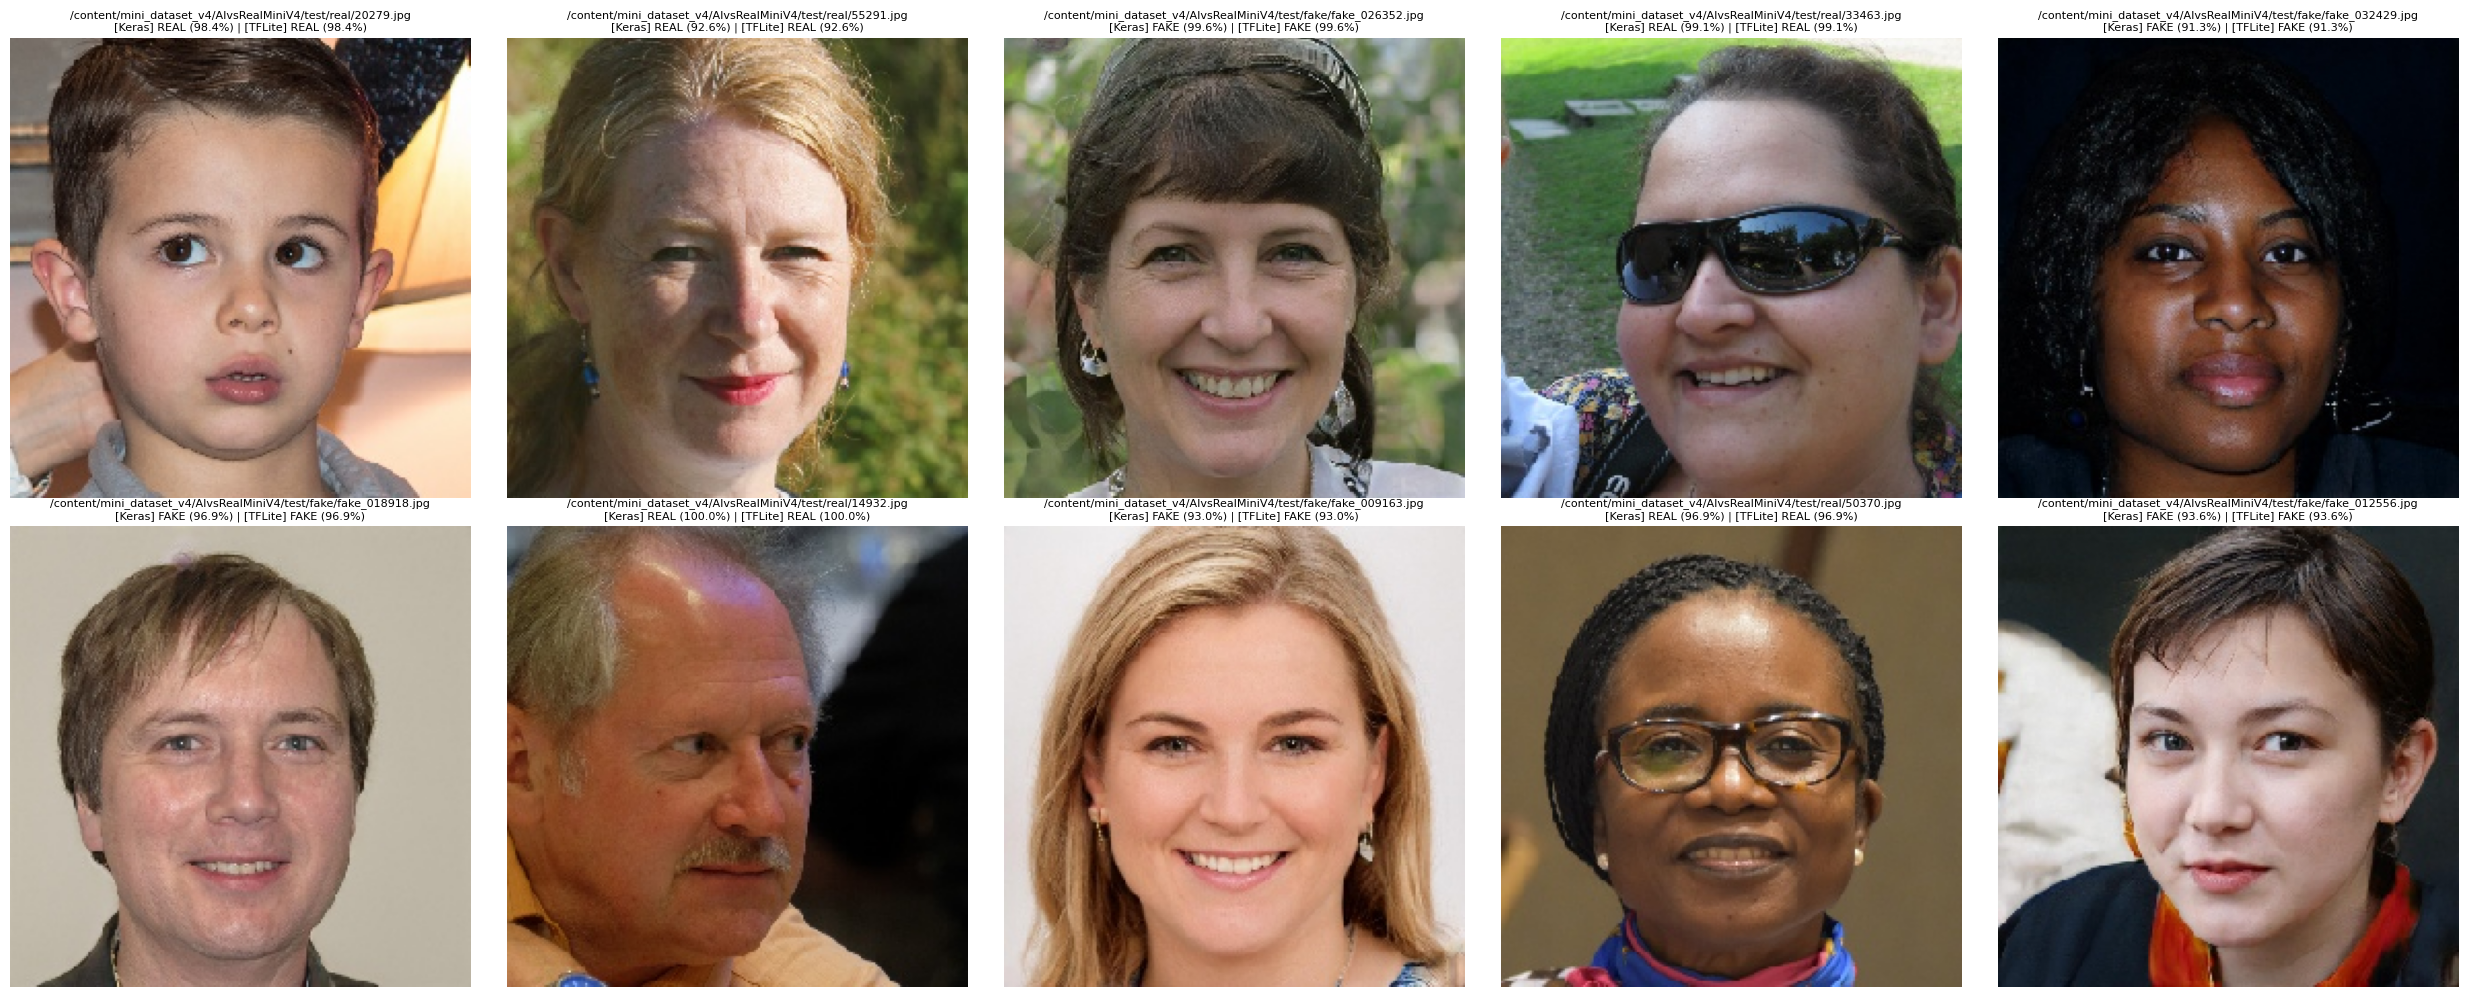

In [ ]:

# Model yolları
keras_model_path = "/content/drive/MyDrive/ai_vs_real_models/efficientnet_100k_98p41_2025-05-15_12-24.keras"
tflite_model_path = "/content/drive/MyDrive/ai_vs_real_models/efficientnet_100k_98p41_2025-05-15_12-24.tflite"

# Keras model yükle
keras_model = tf.keras.models.load_model(keras_model_path, custom_objects={
    "focal_loss_fixed": binary_focal_loss(),
    "preprocess_input": preprocess_input
})

# Karşılaştırmalı test başlat
compare_models_on_random_images_single_display_filename(keras_model, tflite_model_path, num_images=10)
